In [ ]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


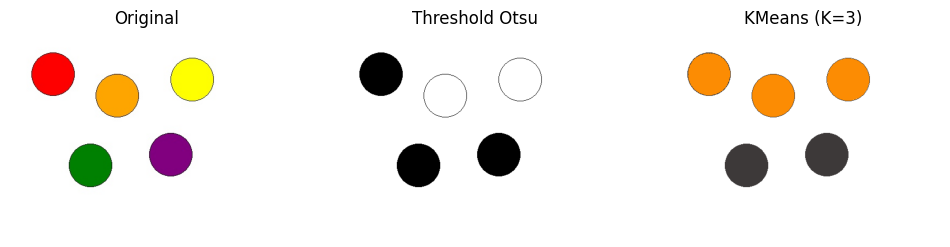

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/fruits.jpg")
assert img is not None, "fruits.jpg tdak ditemukan"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold Otsu
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# K-Means Clustering (BGR)
Z = img.reshape((-1, 3)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
seg = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(th, cmap="gray")
plt.title("Threshold Otsu")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(seg, cv2.COLOR_BGR2RGB))
plt.title("KMeans (K=3)")
plt.axis("off")
plt.tight_layout; plt.show()

Tugas: Segmentasikan  objek merah dari latar belakang menggunakan hasil clustering + masking


Pusat Cluster Merah Terpilih (BGR): [255 255 255]


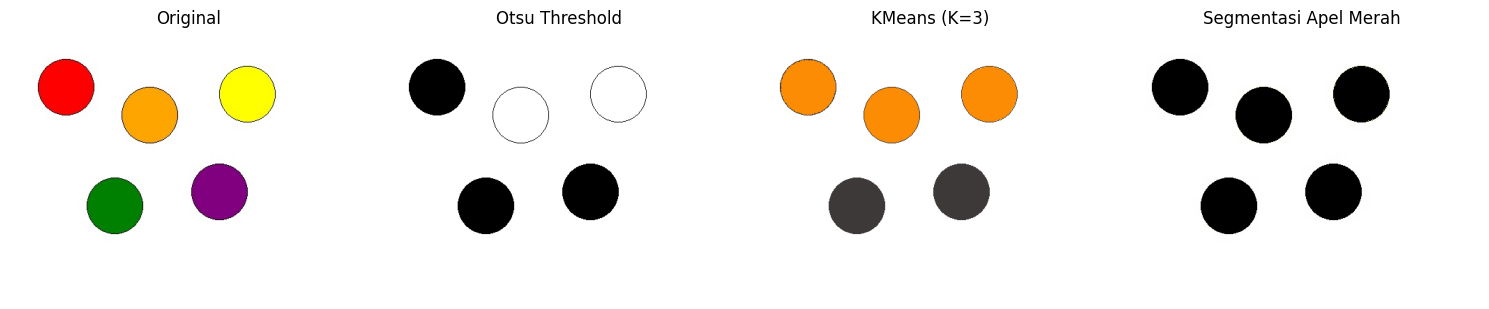

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/fruits.jpg")
assert img is not None, "fruits.jpg tidak ditemukan."
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshold_value, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Z = img.reshape((-1, 3)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi pusat cluster ke uint8
centers = np.uint8(centers)
seg = centers[labels.flatten()].reshape(img.shape)

# --- Penambahan: Segmentasi Objek Merah ---
# 1. Identifikasi Pusat Cluster Merah
red_cluster_index = np.argmax(centers[:, 2])
red_center = centers[red_cluster_index]

print(f"Pusat Cluster Merah Terpilih (BGR): {red_center}")

# 2. Buat Mask dari Cluster Merah
# Membuat array boolean di mana hanya piksel dengan label cluster merah yang bernilai True.
red_mask_bool = (labels.flatten() == red_cluster_index)

# Mengubah mask boolean menjadi citra biner (0 atau 255)
red_mask = red_mask_bool.reshape(gray.shape).astype(np.uint8)
# Kalikan 255 agar mask terlihat putih
red_mask = red_mask * 255

# 3. Aplikasikan Masking (cv2.bitwise_and)
red_apple_segment = cv2.bitwise_and(img, img, mask=red_mask)


# --- Plotting Hasil Akhir (4 Subplot) ---
plt.figure(figsize=(15, 4))

# Subplot 1: Original
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# Subplot 2: Otsu Threshold
plt.subplot(1, 4, 2)
plt.imshow(thresh_otsu, cmap="gray")
plt.title("Otsu Threshold")
plt.axis("off")

# Subplot 3: KMeans (K=3)
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(seg, cv2.COLOR_BGR2RGB))
plt.title("KMeans (K=3)")
plt.axis("off")

# Subplot 4: Hasil Segmentasi Apel Merah
plt.subplot(1, 4, 4)
# Hasil bitwise_and adalah BGR, konversi ke RGB untuk tampilan matplotlib
plt.imshow(cv2.cvtColor(red_apple_segment, cv2.COLOR_BGR2RGB))
plt.title("Segmentasi Apel Merah")
plt.axis("off")

plt.tight_layout()
plt.show()

**TUGAS: BUATLAH CODING TENTANG SEGMENTASI DENGAN MINIMAL 4 METODE**

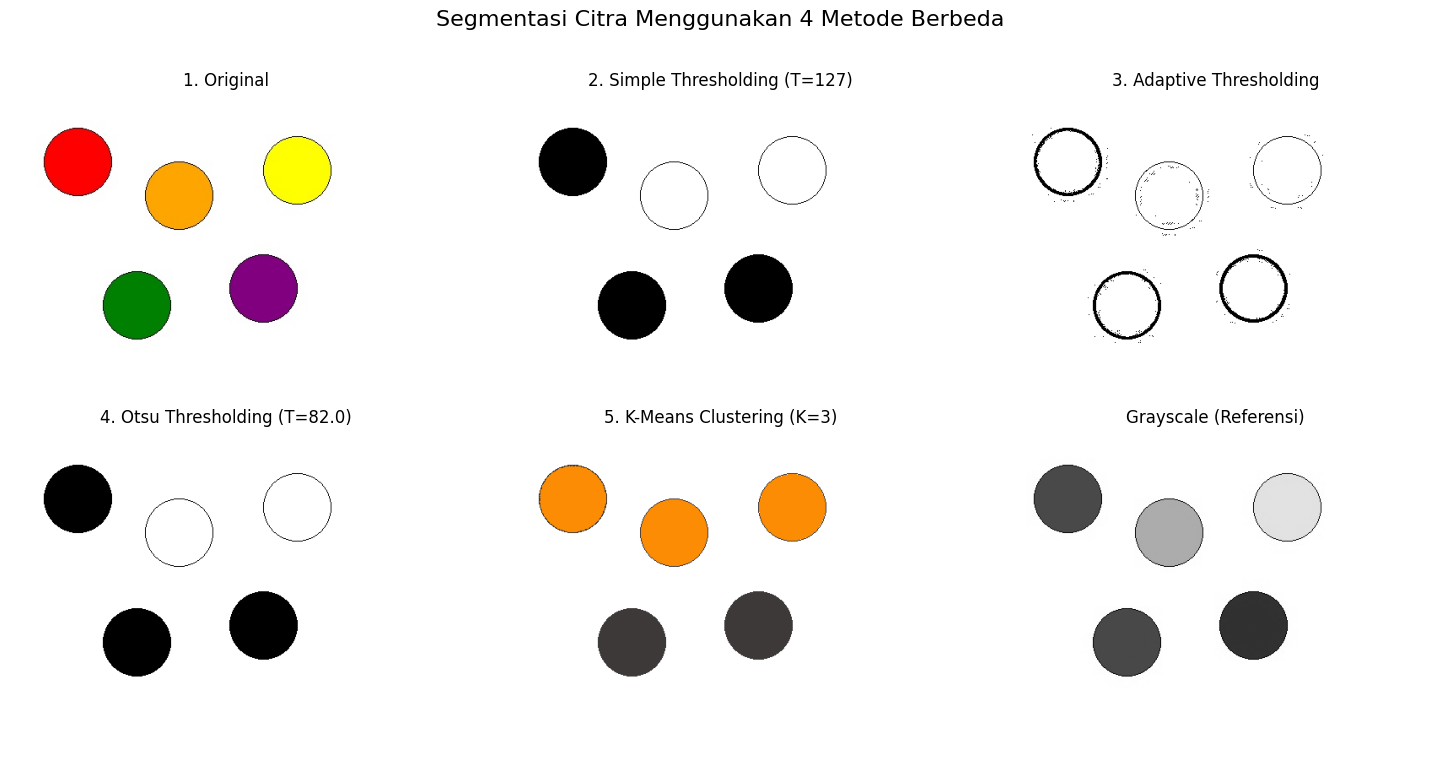

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive # Hanya diperlukan jika di Google Colab dan file ada di Drive

# --- Pengaturan Awal ---

# Ganti dengan path file citra Anda
IMAGE_PATH = "/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/fruits.jpg"

# Jika file ada di Google Drive, jalankan drive mount ini:
# drive.mount("/content/drive")

# Memuat (load) citra
img = cv2.imread(IMAGE_PATH)
assert img is not None, f"Citra tidak ditemukan di path: {IMAGE_PATH}"

# Konversi ke skala abu-abu (diperlukan untuk Thresholding)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- 1. Metode Simple Thresholding ---
# Nilai threshold (batas) ditentukan secara manual.
# Di sini, 127 adalah nilai batas, dan THRESH_BINARY menghasilkan citra biner.
thresh_value = 127
ret_simple, simple_thresh = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY)

# --- 2. Metode Adaptive Thresholding ---
# Nilai threshold dihitung untuk area kecil (blok) citra, sehingga lebih baik untuk citra dengan pencahayaan tidak merata.
# ADAPTIVE_THRESH_GAUSSIAN_C: menggunakan bobot Gaussian dari rata-rata di jendela.
# BLOCK_SIZE = 11: ukuran lingkungan piksel.
# C = 2: konstanta yang dikurangi dari rata-rata tertimbang.
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# --- 3. Metode Otsu Thresholding (Otsu's Binarization) ---
ret_otsu, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- 4. Metode K-Means Clustering (Segmentasi Warna) ---
K = 3 # Jumlah cluster warna yang diinginkan

Z = np.float32(img.reshape((-1, 3)))

# Kriteria penghentian iterasi K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Jalankan K-Means
compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Bentuk ulang hasil cluster menjadi citra
centers = np.uint8(centers)
kmeans_seg = centers[labels.flatten()]
kmeans_seg = kmeans_seg.reshape(img.shape)

# --- Plotting Hasil ---

plt.figure(figsize=(15, 8))
plt.suptitle("Segmentasi Citra Menggunakan 4 Metode Berbeda", fontsize=16)

# 1. Citra Asli (BGR -> RGB untuk Matplotlib)
plt.subplot(2, 3, 1) # Baris 2, Kolom 3, Plot 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("1. Original")
plt.axis("off")

# 2. Simple Thresholding
plt.subplot(2, 3, 2)
plt.imshow(simple_thresh, cmap="gray")
plt.title(f"2. Simple Thresholding (T={thresh_value})")
plt.axis("off")

# 3. Adaptive Thresholding
plt.subplot(2, 3, 3)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("3. Adaptive Thresholding")
plt.axis("off")

# 4. Otsu Thresholding
plt.subplot(2, 3, 4)
plt.imshow(otsu_thresh, cmap="gray")
plt.title(f"4. Otsu Thresholding (T={round(ret_otsu, 2)})")
plt.axis("off")

# 5. K-Means Clustering
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(kmeans_seg, cv2.COLOR_BGR2RGB))
plt.title(f"5. K-Means Clustering (K={K})")
plt.axis("off")

# 6. Citra Grayscale (Sebagai referensi)
plt.subplot(2, 3, 6)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale (Referensi)")
plt.axis("off")


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Atur tata letak agar tidak tumpang tindih
plt.show()